In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from os.path import join

%matplotlib inline

In [23]:
# read file
file_name = join(path_prefix, 'yeastExpression.txt')
df = pd.read_csv(file_name, sep='\t')
df.head()

,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19
0,YHR007C,0.224,0.367,0.312,0.014,-0.003,-1.357,-0.811
1,YAL051W,0.002,0.634,0.310,0.441,0.458,-0.136,0.275
2,YAL054C,-1.070,-0.514,-0.220,-0.012,-0.215,1.741,4.239
3,YAL056W,0.090,0.884,0.165,0.199,0.034,0.148,0.935
4,YAL001C,-0.372,1.168,-0.213,0.206,-0.173,-0.013,0.285


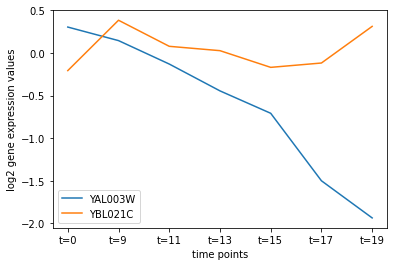

In [24]:
# QUESTION 1
first = df.iloc[5]
second = df.iloc[34]
x = first.keys()[1:8]
y1 = first.values[1:8]
y2 = second.values[1:8]
plt.plot(x, y1, label=first.values[0])
plt.plot(x, y2, label=second.values[0])
plt.xlabel('time points')
plt.ylabel('log2 gene expression values')
plt.legend()
plt.show()

In [25]:
# QUESTION 2
from scipy import stats
stats.spearmanr(y1, y2)

SpearmanrResult(correlation=-0.14285714285714288, pvalue=0.7599453002180929)

In [27]:
# QUESTION 3
def calculate_variance(row):
  vals = row.values[1:8]
  return np.var(vals, ddof=1)

df['variance'] = df.apply(calculate_variance, axis=1)
df.sort_values('variance', ascending=False, inplace=True)
the_most = df.iloc[0].ID
the_least = df.iloc[-1].ID
'MOST: ' + the_most + '   ' + 'LEAST: ' + the_least

'MOST: YJL009W   LEAST: YPL016W'

In [28]:
# QUESTION 4
df.iloc[0:800]

,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19,variance
3839,YJL009W,0.078,-0.123,0.062,-0.161,0.113,0.205,-8.950,11.534279
801,YJL216C,-0.545,-1.573,-0.098,-0.268,-6.310,1.234,0.441,6.191016
531,YGL184C,-1.322,-3.467,-0.051,-0.588,-4.222,1.594,1.012,4.736351
605,YGR225W,-1.061,-4.479,0.735,0.220,-0.285,2.120,0.627,4.350111
562,YGR043C,-0.400,-1.345,-0.282,-0.071,0.379,3.962,3.122,3.921612
...,...,...,...,...,...,...,...,...,...
2947,YOR369C,0.164,0.343,0.162,0.345,0.163,-0.582,-1.649,0.535934
3111,YAL036C,0.187,0.128,0.326,-0.482,-0.353,-1.178,-1.606,0.535759
3983,YKL198C,-0.673,-0.495,-0.223,-0.291,-1.760,0.665,-0.077,0.535750
5737,YMR136W,-0.384,0.232,0.750,0.357,0.906,1.469,1.734,0.535557


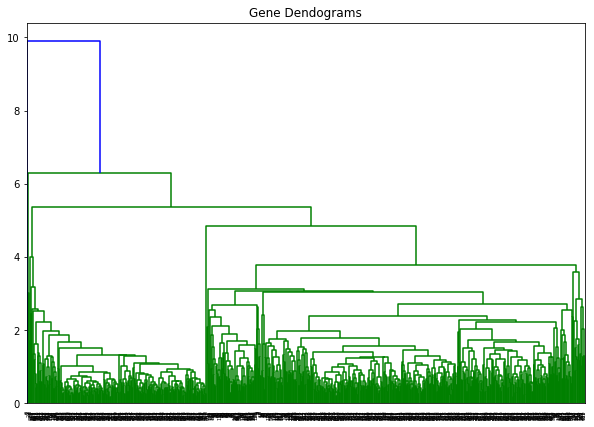

In [29]:
# QUESTION 5
import scipy.cluster.hierarchy as shc
data = df.iloc[:,1:8].values
data = data [0:800]
plt.figure(figsize=(10, 7))
plt.title("Gene Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='average'))

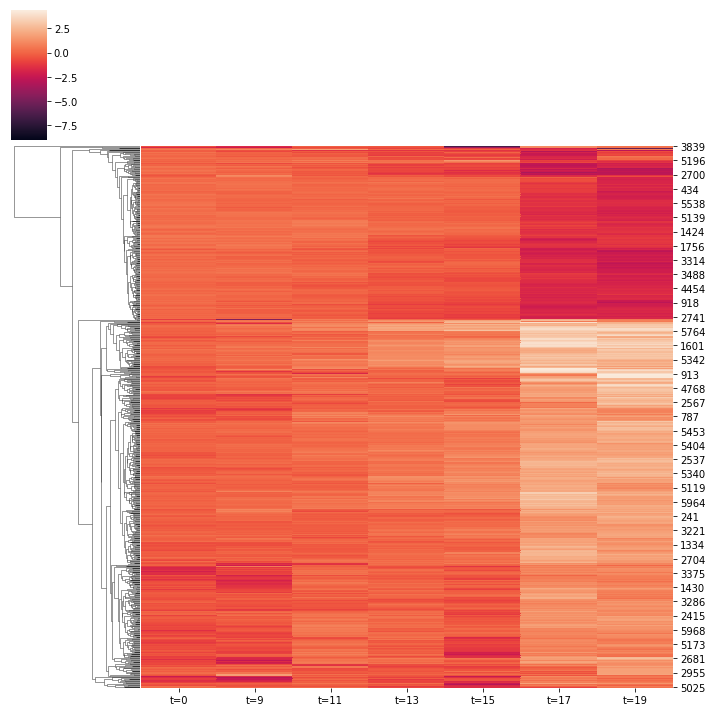

In [30]:
# heat map
sns.clustermap(df.iloc[0:800, 1:8], method='average', metric='euclidean',col_cluster=False)